In [2]:
from nsga2.problem import Problem
from nsga2.evolution import Evolution
import matplotlib.pyplot as plt
import math
import random as r
import numpy as np

#Paquetes a usar para los MOOP
from EMO.MOOP import MOOP
from EMO.MOOP import Obj_NonRed
from EMO.MOOP import PCAs

In [3]:
def f1(x):
    if x[0]+x[1] >=1:
        return 0.5*x[0] + x[1]
    else:
        return 5000

def f2(x):
    if x[0]+x[1] >=1:
        return 1.5*x[0] + x[1]
    else:
        return 5000

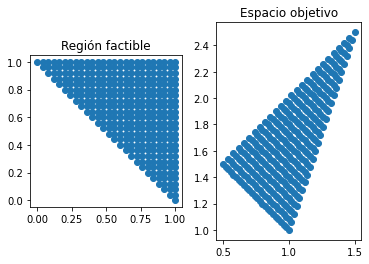

In [10]:
n = 26
x1, y1 = np.meshgrid(np.linspace(0,1,n), np.linspace(0,1,n))
x1 = np.repeat(x1, 1)
y1 = np.repeat(y1, 1)
x = []
y = []
for i in range(len(x1)):
    if x1[i]+y1[i] >= 1:
        x.append(x1[i])
        y.append(y1[i])

plt.subplot(1, 2, 1) # 1 fila, 2 columnas, posición 1
plt.plot(x,y,'o')
plt.axis('scaled')
plt.title('Región factible')


valores_f1 = [f1([x[i],y[i]]) for i in range(len(x))]
valores_f2 = [f2([x[i],y[i]]) for i in range(len(x))]

plt.subplot(1, 2, 2) # posición 2
plt.plot(valores_f1,valores_f2,'o')
plt.axis('scaled')
plt.title('Espacio objetivo')
plt.show()

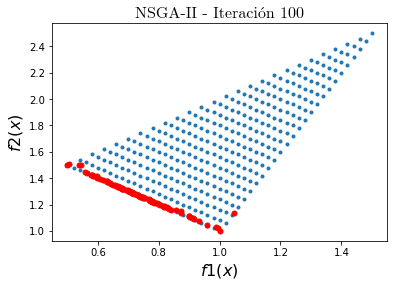

In [11]:
problem = MOOP(num_variables = 2, functions = [f1, f2], intervals = (0, 1))
problem.solveNSGA2(num_generations = 100, plot_iter = 'last', objective_space = [valores_f1, valores_f2])

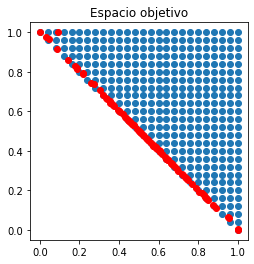

In [18]:
xy = problem.reord(problem.population)


plt.plot(x,y,'o')
plt.plot(xy[0],xy[1],'ro')
plt.axis('scaled')
plt.title('Espacio objetivo')
plt.show()